# Pymaceuticals Inc.
Analysis

In this data, the pie charts created does show that there are a greater distribution of male mice compared to female mice which could be taken into consideration. Additional analysis could be done to see if there are any patterns directly with the sex of the mice only. In addition, according to the results it does seem that Ramicane may be as successful as Capomulin. These two treatments reflect an average tumor volume between 40-45, which is lower than the others. While it does seem that no mice were rid of the tumors entirely due to treatment, the top two have decreased the volume significantly. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame 
pharm_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
pharm_data_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count =  pharm_data_complete["Mouse ID"].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
id_mice_dupe = pharm_data_complete.loc[pharm_data_complete[["Mouse ID", "Timepoint"]].duplicated(keep= False)]
id_mice_dupe

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mice_data = pharm_data_complete.loc[pharm_data_complete["Mouse ID"] == 'g989']
dupe_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pharm_data_cleaned = pharm_data_complete.drop_duplicates(subset=dupe_mice_data, keep= False)
pharm_data_cleaned.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = pharm_data_cleaned["Mouse ID"].nunique()
#accurate_num_mice = len(num_mice)
#accurate_num_mice
num_mice

249

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = pharm_data_cleaned.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_median = pharm_data_cleaned.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_variance = pharm_data_cleaned.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_std = pharm_data_cleaned.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_sem = pharm_data_cleaned.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({"Mean Tumor Volume" : tumor_mean, 
                                   "Median Tumor Volume" : tumor_median, 
                                   "Tumor Volume Variance" : tumor_variance,
                                   "Tumor Volume Std. Dev." : tumor_std, 
                                   "Tumor Volume Std. Err." : tumor_sem})

summary_statistics

/var/folders/qb/mn213hg14xb2nc3s79pt8f2h0000gn/T/ipykernel_2277/2589362889.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_mean = pharm_data_cleaned.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
/var/folders/qb/mn213hg14xb2nc3s79pt8f2h0000gn/T/ipykernel_2277/2589362889.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_median = pharm_data_cleaned.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
/var/folders/qb/mn213hg14xb2nc3s79pt8f2h0000gn/T/ipykernel_2277/2589362889.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future ver

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.414660,50.965298,42.199890,6.496144,0.515178
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics2 = pharm_data_cleaned.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].aggregate(['mean', 'median', 'var', 'std', 'sem'])

summary_statistics2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.414660  50.965298  42.199890  6.496144  0.515178
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

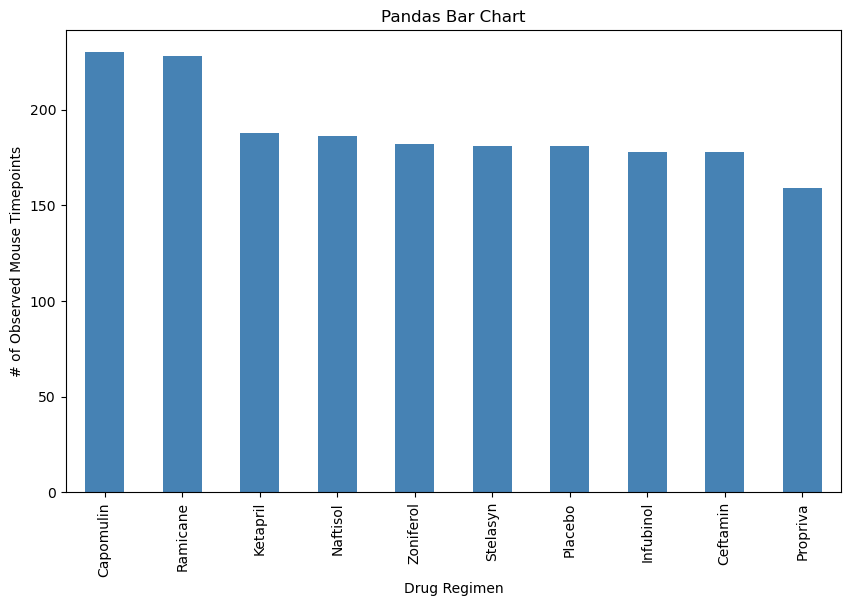

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_time_data = pharm_data_cleaned["Drug Regimen"].value_counts()

panda_bar = mouse_time_data.plot(kind="bar", figsize=(10,6), color="steelblue")


plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Pandas Bar Chart")

plt.show()
plt.tight_layout()

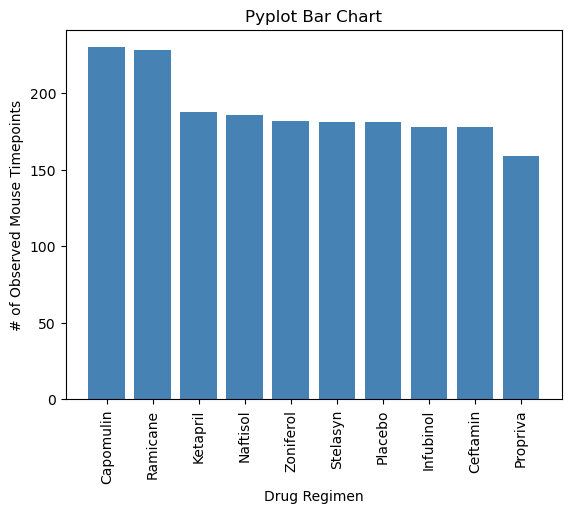

<Figure size 1000x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mouse_time_data.index.values
y_axis = mouse_time_data.values

plt.bar(x_axis, y_axis, color="steelblue", align="center")

#tick_locations = [value for value in x_axis]


plt.title("Pyplot Bar Chart")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.figure(figsize=(10, 6))

plt.show()
plt.tight_layout()

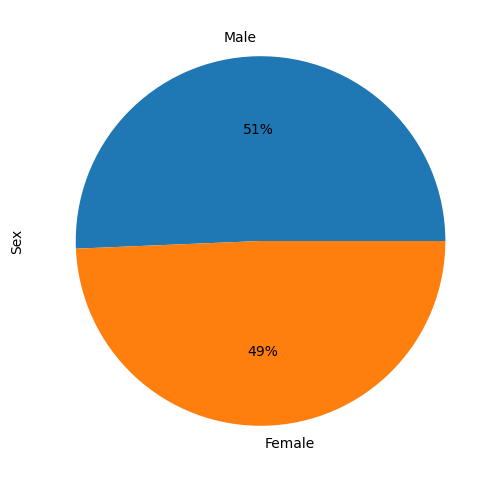

<Figure size 640x480 with 0 Axes>

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_vs_female = pharm_data_cleaned["Sex"].value_counts()
panda_pie = male_vs_female.plot(kind="pie", figsize=(10,6), autopct='%1.0f%%')


plt.show()
plt.tight_layout()


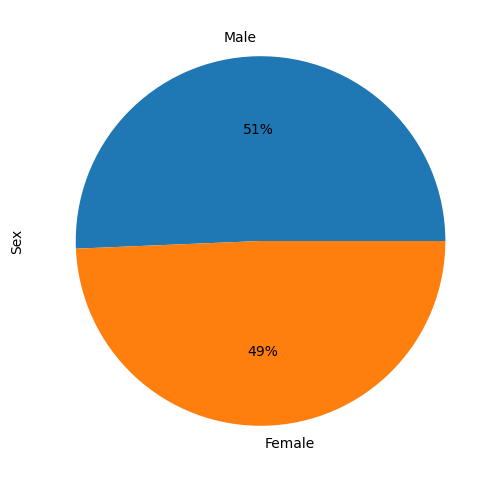

<Figure size 640x480 with 0 Axes>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']

fig = plt.figure(figsize =(10, 6))
plt.pie(male_vs_female, labels = labels, autopct='%1.0f%%')
plt.ylabel('Sex')

plt.show()
plt.tight_layout()

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_great = pharm_data_cleaned.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_columedf = pd.merge(pharm_data_cleaned,timepoint_great, how="left", on=["Mouse ID", "Timepoint"])

tumor_columedf.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treat_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

index = 0

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#for each in treat_names:
  
        # add subset 
        #tumor_vol_data.append(tumor_columedf[each])

    
        # Locate the rows which contain mice on each drug and get the tumor volumes
        #quartiles = tumor_columedf[each].quantile([.25, .5, .75])
        #lowerq = quartiles[0.25]
        #upperq = quartiles[0.75]
        #iqr = upperq - lowerq
        #lower_bound = lowerq - (1.5*iqr)
        #upper_bound = upperq + (1.5*iqr)

        # Determine outliers using upper and lower bounds
        #if index == 0:
        
            #print(f'{each} potential outliers are between {lower_bound} and {upper_bound}')

       
        #index += 1
        


    

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



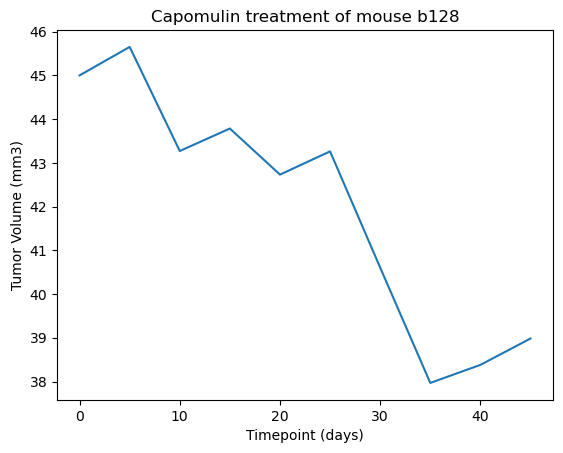

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_line = tumor_columedf.loc[(tumor_columedf["Mouse ID"] == "b128")]
mouse_line = mouse_line.set_index("Timepoint")

mouse_line["Tumor Volume (mm3)"].plot()
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse b128")
plt.show()

/var/folders/qb/mn213hg14xb2nc3s79pt8f2h0000gn/T/ipykernel_2277/1120314366.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mouse_scatter_avg = mouse_scatter.groupby(["Mouse ID"]).mean()


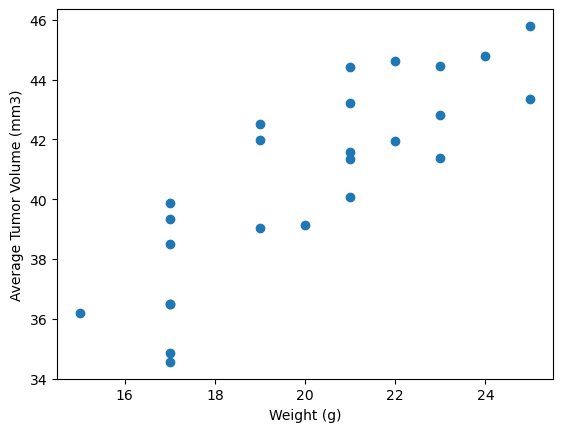

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_scatter = tumor_columedf.loc[(tumor_columedf["Drug Regimen"] == "Capomulin")]

mouse_scatter_avg = mouse_scatter.groupby(["Mouse ID"]).mean()

mouse_weight = mouse_scatter_avg["Weight (g)"]
mouse_volume = mouse_scatter_avg["Tumor Volume (mm3)"]


plt.scatter(mouse_weight, mouse_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

The correlation coefficient is:  0.84 


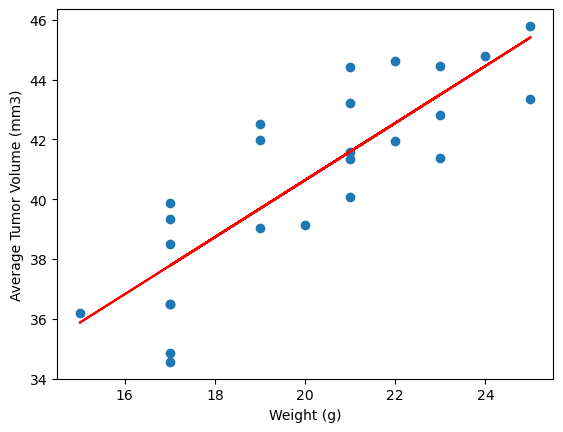

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(mouse_weight, mouse_volume)
print(f'The correlation coefficient is:  {round(correlation[0],2)} ')

#creating the x and y values
x_values = mouse_weight
y_values = mouse_volume

#creating the line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()